In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import random

l1 = 7
l2 = 7
l3 = 7

In [2]:
def plot_coordinates(csv_file):
    df = pd.read_csv(csv_file)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(2, 1, figsize=(13, 7))  

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [3]:
def plot_subset_coordinates(csv_file, limit = 100):
    df = pd.read_csv(csv_file, nrows=limit)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
def displayWorkSpace(csv_file):
    data = pd.read_csv(csv_file)
    plt.scatter(data['x_scaled'], data['y_scaled'], color = 'lightsalmon')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.grid()

In [5]:
def randomStepSizeDataset():
    data = []
    for i in range(1, 150001):
        q1 = round(random.uniform(0, m.pi), 2)
        q2 = round(random.uniform(-m.pi, 0), 2)
        q3 = round(random.uniform(-m.pi / 2, m.pi / 2))

        theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
        x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
        y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
        data.append([x_s, y_s, theta_o, q1, q2, q3])

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])

    df.to_csv('Three Link_Random Step Size.csv', index = False)

randomStepSizeDataset()

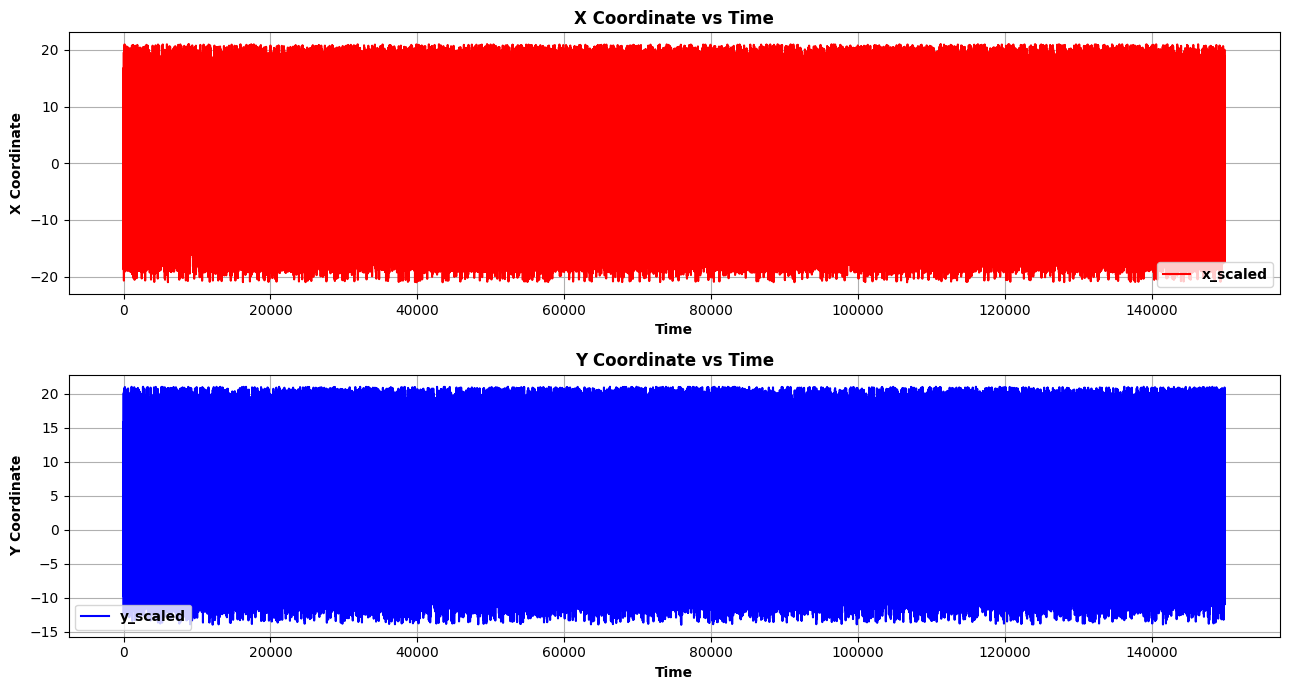

In [6]:
plot_coordinates("Three Link_Random Step Size.csv")

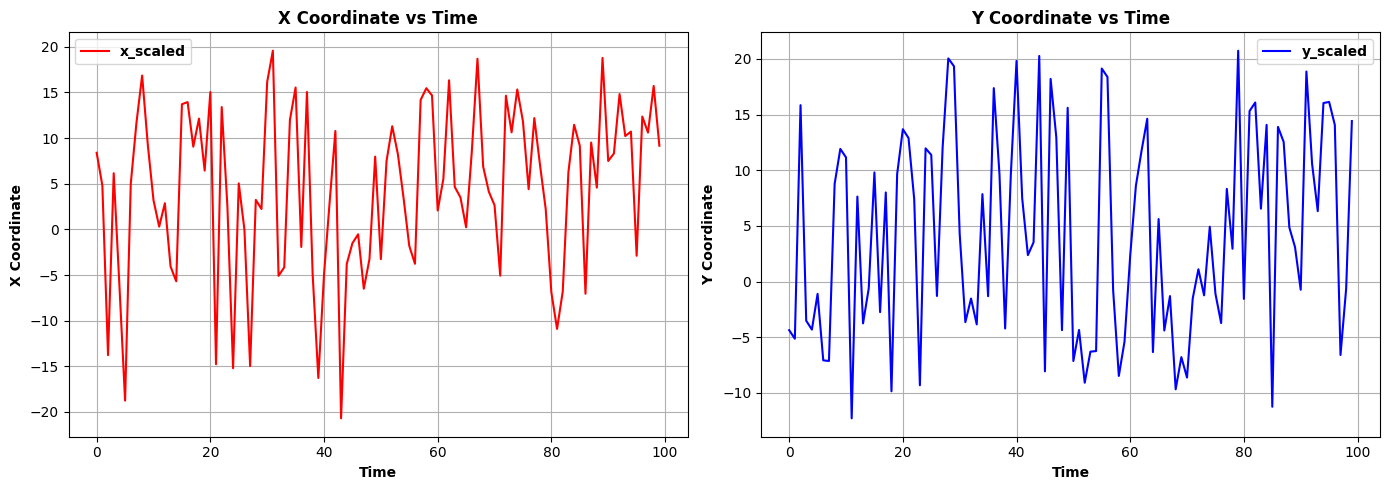

In [7]:
plot_subset_coordinates("Three Link_Random Step Size.csv")

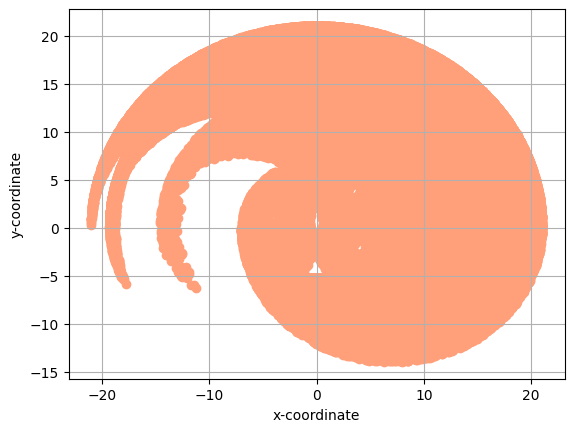

In [8]:
displayWorkSpace("Three Link_Random Step Size.csv")

In [9]:
def fixedStepSizeDataset(target_samples=150000):
    data = []
    
    individual_count = m.ceil(target_samples ** (1/3))
    
    q1_values = np.linspace(0, m.pi, individual_count)
    q2_values = np.linspace(-m.pi, 0, individual_count)
    q3_values = np.linspace(-m.pi / 2, m.pi / 2, individual_count)

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= target_samples:
                    break
            if len(data) >= target_samples:
                break
        if len(data) >= target_samples:
            break

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Fixed Step Size.csv', index=False)

fixedStepSizeDataset()

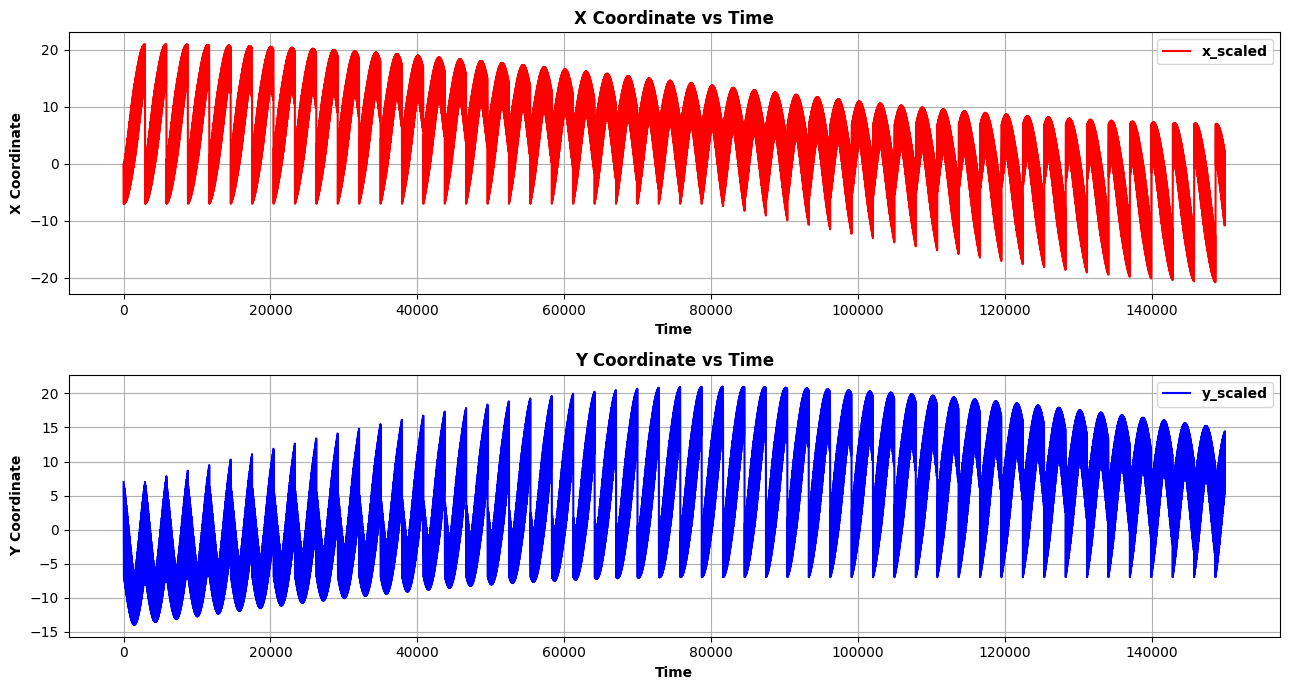

In [10]:
plot_coordinates("Three Link_Fixed Step Size.csv")

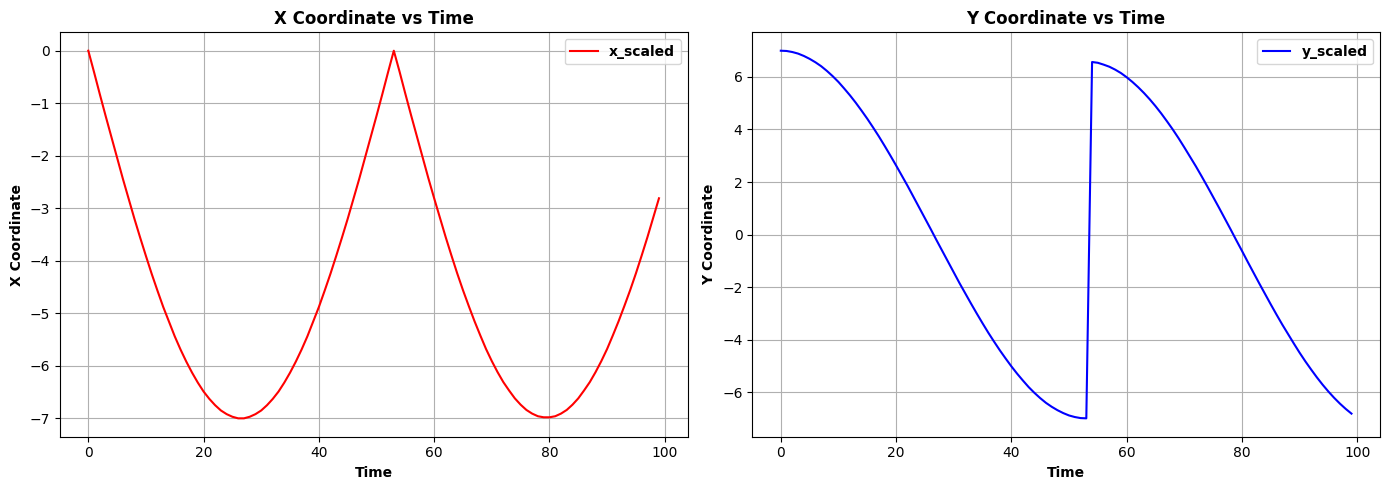

In [11]:
plot_subset_coordinates("Three Link_Fixed Step Size.csv")

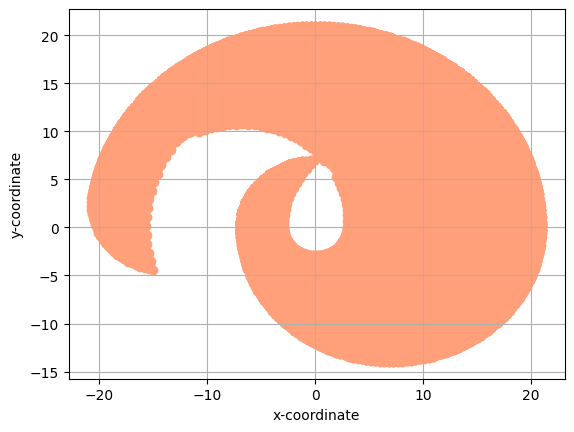

In [12]:
displayWorkSpace("Three Link_Fixed Step Size.csv")

In [13]:
def sinusoidalTrajectoryDataset(target_samples=150000):
    data = []
    individual_count = m.ceil(target_samples ** (1/3))
    t_values = np.linspace(0, 2 * m.pi, individual_count)

    q1_values = [((m.pi / 2) * (1 + m.sin(t)) / 2) for t in t_values]
    q2_values = [(-m.pi * (1 + m.sin(2 * t)) / 2) for t in t_values]
    q3_values = [((m.pi / 2) * m.sin(3 * t)) for t in t_values]

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= target_samples:
                    break
            if len(data) >= target_samples:
                break
        if len(data) >= target_samples:
            break

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Sinusoidal Trajectory.csv', index=False)

sinusoidalTrajectoryDataset()

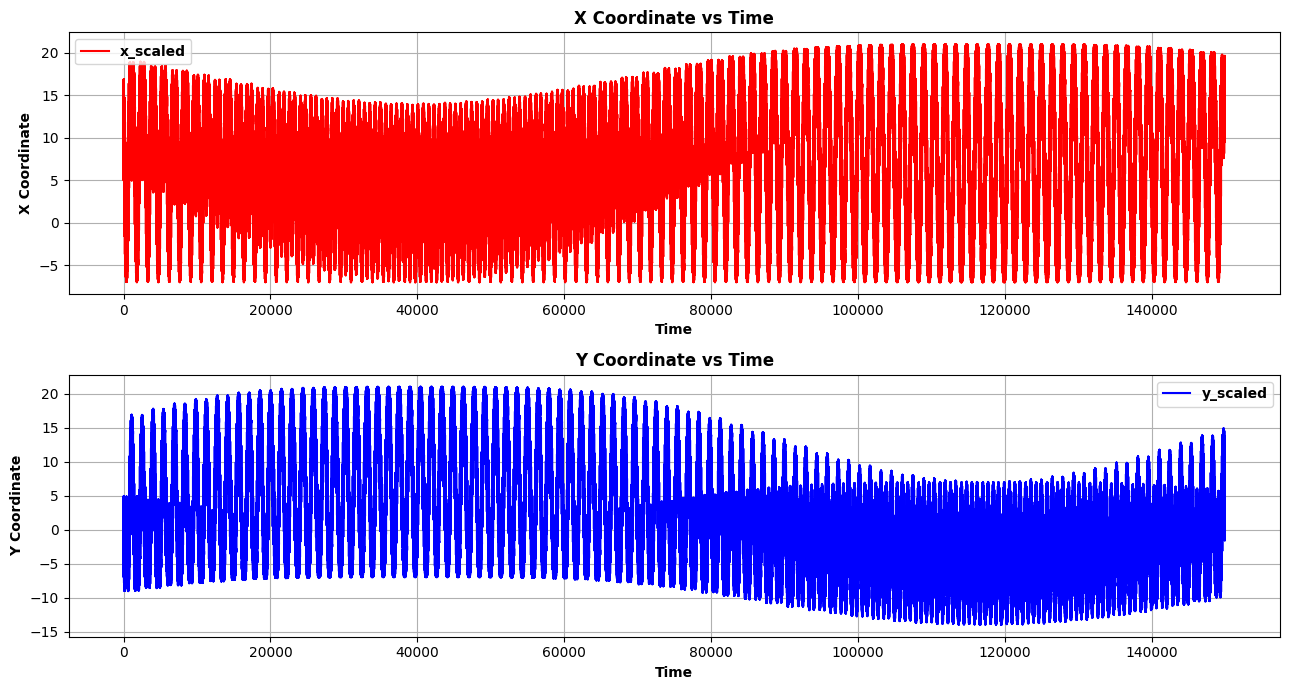

In [14]:
plot_coordinates("Three Link_Sinusoidal Trajectory.csv")

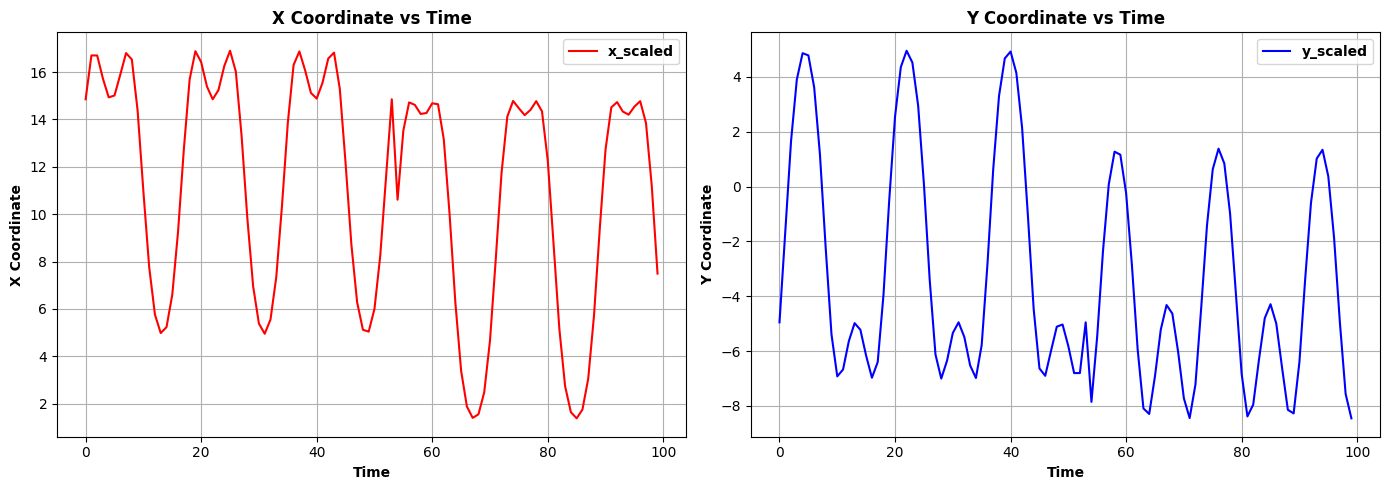

In [15]:
plot_subset_coordinates("Three Link_Sinusoidal Trajectory.csv")

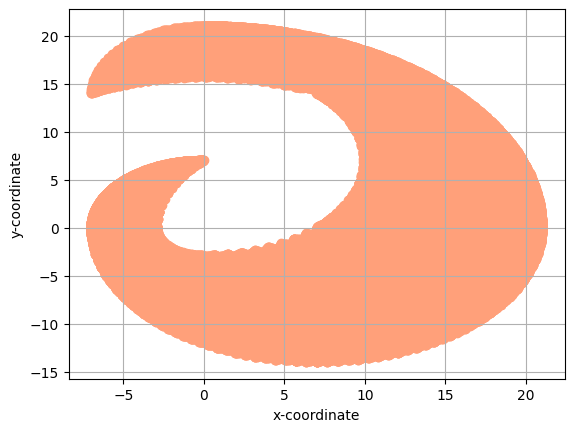

In [16]:
displayWorkSpace("Three Link_Sinusoidal Trajectory.csv")